In [1]:
import pandas as pd
import numpy as np

In [356]:
df=pd.read_csv('C:\\Users\\Ajit Wagh\\Desktop\\TimeSeries\\Brazilian Eccomerce Dataset\\product_categories\\ferramentas_jardim.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (589, 3)


,order_purchase_date,product_category_name,price
0,2016-09-05,ferramentas_jardim,49.90
1,2016-10-04,ferramentas_jardim,461.80
2,2016-10-05,ferramentas_jardim,1023.21
3,2016-10-06,ferramentas_jardim,579.00
4,2016-10-07,ferramentas_jardim,158.53


In [353]:
df.reset_index()

,order_purchase_date,product_category_name,price
0,2016-09-05,ferramentas_jardim,49.90
1,2016-10-04,ferramentas_jardim,461.80
2,2016-10-05,ferramentas_jardim,1023.21
3,2016-10-06,ferramentas_jardim,579.00
4,2016-10-07,ferramentas_jardim,158.53
...,...,...,...
584,2018-08-24,ferramentas_jardim,277.70
585,2018-08-25,ferramentas_jardim,234.54
586,2018-08-26,ferramentas_jardim,155.28
587,2018-08-27,ferramentas_jardim,78.14


In [357]:
df=df[['order_purchase_date','price']]

In [361]:
df['month'] = df['order_purchase_date'].str[:7]

In [362]:
df.head()

,order_purchase_date,price,month
0,2016-09-05,49.90,2016-09
1,2016-10-04,461.80,2016-10
2,2016-10-05,1023.21,2016-10
3,2016-10-06,579.00,2016-10
4,2016-10-07,158.53,2016-10


In [360]:
print(df.index.min())
print(df.index.max())

0
588


<AxesSubplot:>

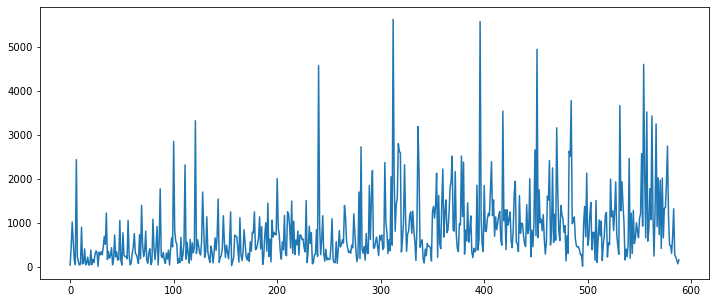

In [359]:
df['price'].plot(figsize=(12,5))

In [330]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [331]:
adf_test(df['price'])

1. ADF :  -3.686351145049369
2. P-Value :  0.004309285337136332
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 576
5. Critical Values :
	 1% :  -3.441753961421302
	 5% :  -2.866570853087291
	 10% :  -2.5694492998890817


In [332]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [334]:
stepwise_fit = auto_arima(df['price'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  589
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -4714.412
Date:                Thu, 13 May 2021   AIC                           9436.824
Time:                        21:16:25   BIC                           9454.331
Sample:                             0   HQIC                          9443.645
                                - 589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0616      0.051      1.213      0.225      -0.038       0.161
ar.L2          0.0876      0.035      2.477      0.013       0.018       0.157
ma.L1         -0.9749      0.011    -89.889      0.000      -0.996      -0.954
sigma2      5.369e+05   1.49e+04     35.996      0.000    5.08e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2657.14
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.42   Skew:                             2.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [335]:
from statsmodels.tsa.arima_model import ARIMA

In [336]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(589, 2)
(559, 2) (30, 2)
product_category_name    ferramentas_jardim
price                                863.97
Name: 2018-07-30 00:00:00, dtype: object product_category_name    ferramentas_jardim
price                                 168.6
Name: 2018-08-29 00:00:00, dtype: object


In [339]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['price'],order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  558
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4464.296
Method:                       css-mle   S.D. of innovations            717.834
Date:                Thu, 13 May 2021   AIC                           8938.592
Time:                        21:20:01   BIC                           8960.214
Sample:                             1   HQIC                          8947.036
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7115      0.224      7.648      0.000       1.273       2.150
ar.L1.D.price     0.0664      0.042      1.574      0.115      -0.016       0.149
ar.L2.D.price     0.0941      0.043      2.211      0.027       0.011       0.178
ma.L1.D.price    -1.0000      0.007   -143.736      0.000      -1.014      -0.986
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.9260           +0.0000j            2.9260            0.0000
AR.2           -3.6321           +0.0000j            3.6321            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [338]:
df1.shape

(22, 1)

<AxesSubplot:xlabel='order_purchase_date'>

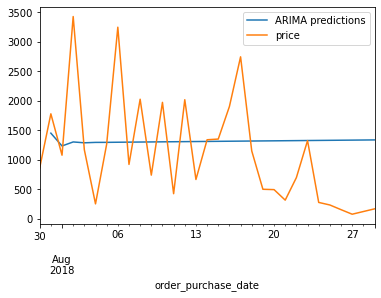

In [340]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-07-31',end='2018-08-29')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test['price'].plot(legend=True)

<AxesSubplot:xlabel='order_purchase_date'>

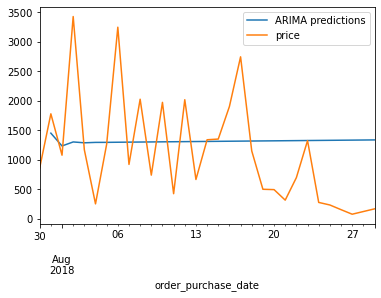

In [341]:
pred.plot(legend='ARIMA Predictions')
test['price'].plot(legend=True)

In [342]:
test['price'].mean()

1153.0106666666666

In [343]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['price']))
print(rmse)

914.8922819069631


In [351]:
mape = np.mean(np.abs((pred - test['price']) / pred)) * 100

In [352]:
mape

84.66032578370532

In [344]:
model2=ARIMA(df['price'],order=(2,1,1))
model2=model2.fit()
df.tail()

,product_category_name,price
order_purchase_date,,
2018-08-24,ferramentas_jardim,277.70
2018-08-25,ferramentas_jardim,234.54
2018-08-26,ferramentas_jardim,155.28
2018-08-27,ferramentas_jardim,78.14
2018-08-29,ferramentas_jardim,168.60


In [349]:
index_future_dates=pd.date_range(start='2018-08-29',end='2018-09-28')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-08-29    1099.110696
2018-08-30    1177.885885
2018-08-31    1276.531639
2018-09-01    1292.884678
2018-09-02    1305.130233
2018-09-03    1308.980898
2018-09-04    1311.809302
2018-09-05    1313.736888
2018-09-06    1315.497597
2018-09-07    1317.157432
2018-09-08    1318.793426
2018-09-09    1320.417744
2018-09-10    1322.038859
2018-09-11    1323.658589
2018-09-12    1325.277902
2018-09-13    1326.897048
2018-09-14    1328.516141
2018-09-15    1330.135214
2018-09-16    1331.754280
2018-09-17    1333.373343
2018-09-18    1334.992405
2018-09-19    1336.611468
2018-09-20    1338.230530
2018-09-21    1339.849592
2018-09-22    1341.468654
2018-09-23    1343.087716
2018-09-24    1344.706778
2018-09-25    1346.325840
2018-09-26    1347.944902
2018-09-27    1349.563964
2018-09-28    1351.183026
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

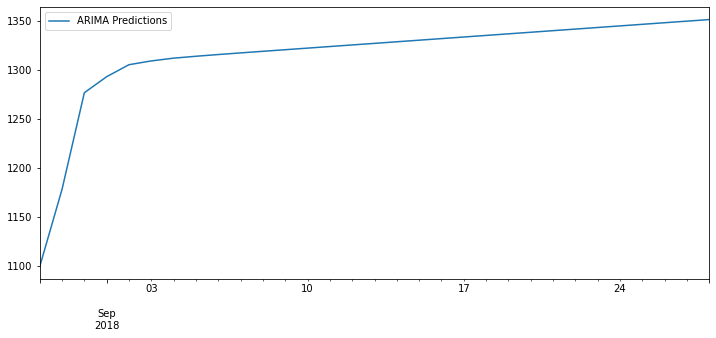

In [350]:
pred.plot(figsize=(12,5),legend=True)

In [ ]:
a = np.mean(np.abs(((df['y']) - (df_cv['yhat'])) / (df_cv['y']))) * 100